# Infer network

Infer a network and plot with gene labels.

## More details
Plot networks inferred from datasets simulated from realistic network structures. Several datasets are available, from different organisms, different numbers of genes in the networks and different numbers of cells in the dataset. To infer a network from a different dataset, make sure the data file is in the same format as the simulated datasets, and change `dataset_name` to the relevant path.

For very large datasets (tens of thousands of cells, thousands of genes), network inference may take a long time. Benchmarking scripts are included to indicate how number of cells, number of genes and algorithm affect the time taken to infer a network.

The network inference algorithms rank all edges, between every possible pair of genes. In order to progress from a ranked list to a network, a threshold must be set, indicating what percentage of the highest-ranked edges to include.

In [1]:
# Include packages
using NetworkInference
using LightGraphs
using GraphPlot
using Pkg
#Pkg.add("CSV")
using CSV

In [2]:
dataset_name = string("../data/2_JULIA/","exprMat_filtered.txt")
# Choose an algorithm
# PIDCNetworkInference(), PUCNetworkInference(), CLRNetworkInference() or MINetworkInference()
algorithm = PIDCNetworkInference()

# Keep the top x% highest-scoring edges
# 0.0 < threshold < 1.0
threshold = 0.15

0.15

In [3]:
dataset_name

"../data/2_JULIA/exprMat_filtered.txt"

In [4]:
# Get the genes and discretize the expression levels
@time genes = get_nodes(dataset_name);
# Troubleshooting: the default discretizer is "bayesian_blocks"
# If this doesn't work, try the "uniform_width" discretizer:
# @time genes = get_nodes(dataset_name, discretizer = "uniform_width");

  3.895453 seconds (13.71 M allocations: 686.200 MiB, 5.24% gc time)


In [5]:
#genes.class()
display(genes[1:5,])

5-element Array{Node,1}:
 Node("Slc1a2", [2, 4, 5, 3, 1, 2, 5, 2, 2, 2  …  4, 2, 3, 2, 1, 1, 7, 5, 2, 6], 7, [0.19, 0.32, 0.16, 0.11, 0.115, 0.06, 0.045])
 Node("Ndrg2", [1, 1, 2, 1, 2, 1, 3, 1, 1, 1  …  1, 1, 1, 1, 2, 1, 4, 2, 1, 2], 4, [0.72, 0.13, 0.085, 0.065])                   
 Node("Hapln1", [1, 1, 1, 1, 1, 1, 1, 1, 1, 4  …  1, 1, 1, 1, 1, 1, 3, 1, 1, 2], 4, [0.78, 0.105, 0.06, 0.055])                  
 Node("Lix1", [2, 3, 1, 3, 1, 1, 2, 3, 1, 3  …  4, 1, 3, 2, 1, 1, 3, 1, 1, 2], 4, [0.525, 0.21, 0.21, 0.055])                    
 Node("Dclk1", [3, 3, 2, 4, 2, 1, 2, 4, 2, 4  …  4, 1, 3, 4, 1, 1, 3, 2, 1, 2], 5, [0.285, 0.255, 0.255, 0.17, 0.035])           

In [6]:
# Infer the network
@time network = InferredNetwork(algorithm, genes);

Gamma distribution failed for Slc1a2 and Oat; used normal instead.
Gamma distribution failed for Slc1a2 and Ccl7; used normal instead.
Gamma distribution failed for Ndrg2 and Oat; used normal instead.
Gamma distribution failed for Ndrg2 and Ccl7; used normal instead.
Gamma distribution failed for Hapln1 and Oat; used normal instead.
Gamma distribution failed for Hapln1 and Ccl7; used normal instead.
Gamma distribution failed for Lix1 and Oat; used normal instead.
Gamma distribution failed for Lix1 and Ccl7; used normal instead.
Gamma distribution failed for Dclk1 and Oat; used normal instead.
Gamma distribution failed for Dclk1 and Ccl7; used normal instead.
Gamma distribution failed for Src and Oat; used normal instead.
Gamma distribution failed for Src and Ccl7; used normal instead.
Gamma distribution failed for Slc6a1 and Oat; used normal instead.
Gamma distribution failed for Slc6a1 and Ccl7; used normal instead.
Gamma distribution failed for Tab2 and Oat; used normal instead.
Gamm

Gamma distribution failed for Ccl7 and B2m; used normal instead.
Gamma distribution failed for Ccl7 and Ubash3b; used normal instead.
Gamma distribution failed for Ccl7 and Cntnap2; used normal instead.
Gamma distribution failed for Ccl7 and Elmo1; used normal instead.
Gamma distribution failed for Ccl7 and Arl4c; used normal instead.
Gamma distribution failed for Ccl7 and Igf1; used normal instead.
Gamma distribution failed for Ccl7 and Nrxn3; used normal instead.
Gamma distribution failed for Ccl7 and Etl4; used normal instead.
Gamma distribution failed for Ccl7 and Nrip3; used normal instead.
Gamma distribution failed for Ccl7 and Reln; used normal instead.
Gamma distribution failed for Ccl7 and Mgll; used normal instead.
Gamma distribution failed for Ccl7 and Kcnc1; used normal instead.
Gamma distribution failed for Ccl7 and Col25a1; used normal instead.
Gamma distribution failed for Ccl7 and Trp53i11; used normal instead.
Gamma distribution failed for Ccl7 and Abat; used normal in

  4.617671 seconds (26.19 M allocations: 1.178 GiB, 9.78% gc time)


In [7]:
# Get the adjacency matrix, then make a LightGraphs.SimpleGraphs.SimpleGraph

adjacency_matrix, labels_to_ids, ids_to_labels = get_adjacency_matrix(network, threshold)
graph = LightGraphs.SimpleGraphs.SimpleGraph(adjacency_matrix)

# Get the node labels, in order of index

number_of_nodes = size(adjacency_matrix)[1]
nodelabels = []
for i in 1 : number_of_nodes
    push!(nodelabels, ids_to_labels[i])
end 

In [8]:
display(graph)

{153, 1744} undirected simple Int64 graph

In [13]:
display(graph)
#save("graph.csv",graph)
#savegraph(file, graph, gname="graphTry", format=LGFormat)
savegraph("../data/2_JULIA/graphJulia.csv", graph)
using CSV
CSV.write("../data/2_JULIA/genesJulia.csv",genes)
#save("../data/2_JULIA/genesJulia.csv",genes)

{153, 1744} undirected simple Int64 graph

"../data/2_JULIA/genesJulia.csv"

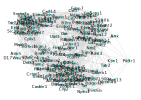

In [10]:
# Plot the network at the given threshold

display(gplot(graph, nodelabel = nodelabels,  nodesize=15, nodelabelsize=0.5))


In [11]:
# display(graph)
# using Pkg
# Pkg.add("CSV")
# using CSV
adjacency_matrix

153×153 Array{Bool,2}:
 0  1  1  1  0  0  0  0  1  0  1  1  1  …  1  1  0  0  1  0  0  0  0  0  0  0
 1  0  1  0  0  0  1  0  1  0  1  1  1     0  1  0  0  0  1  0  0  0  1  0  0
 1  1  0  0  0  0  1  0  0  0  1  1  1     0  0  1  0  0  0  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0  1  0  0  1     0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  1  1  0     0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  0  0  1  0  1  0  0  1  1  …  0  0  0  0  1  0  0  0  1  1  0  0
 1  1  1  0  0  0  1  0  1  0  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  0  0  1  0  1  1  0   